In [1]:
import pandas as pd

# Read in white wine data 
MCdata = pd.read_csv(r"C:\Users\soari\Documents\GitHub\MC_SNR_DNN/SNRdata.csv",header=None)

# Read in red wine data 
MClabel = pd.read_csv(r"C:\Users\soari\Documents\GitHub\MC_SNR_DNN/SNRlabel.csv",header=None)

In [2]:
print(MCdata.info())
print(MClabel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 100 columns):
0     12000 non-null int64
1     12000 non-null float64
2     12000 non-null float64
3     12000 non-null float64
4     12000 non-null float64
5     12000 non-null float64
6     12000 non-null float64
7     12000 non-null float64
8     12000 non-null float64
9     12000 non-null float64
10    12000 non-null float64
11    12000 non-null float64
12    12000 non-null float64
13    12000 non-null float64
14    12000 non-null float64
15    12000 non-null float64
16    12000 non-null float64
17    12000 non-null float64
18    12000 non-null float64
19    12000 non-null float64
20    12000 non-null float64
21    12000 non-null float64
22    12000 non-null float64
23    12000 non-null float64
24    12000 non-null float64
25    12000 non-null float64
26    12000 non-null float64
27    12000 non-null float64
28    12000 non-null float64
29    12000 non-null float64
30    12000 non-null f

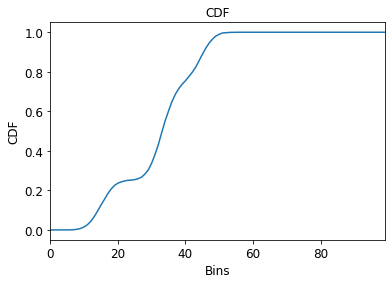

In [3]:
import matplotlib.pyplot as plt
pm = MCdata[100:101]
# pm.plot(kind='bar',legend=False)
ax = pm.transpose().plot(kind='line', title ="CDF", figsize=(6, 4), legend=False, fontsize=12) 
ax.set_xlabel("Bins", fontsize=12)
ax.set_ylabel("CDF", fontsize=12)
plt.show()
    # plt.savefig('filename.png', dpi=600)


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(MCdata, MClabel, test_size=0.33, random_state=42)



In [5]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Initialize the constructor
model = Sequential()

# # Add an input layer 
# model.add(Dense(100, activation='relu', input_shape=(100,)))

# # Add one hidden layer 
# model.add(Dense(20, activation='relu'))

# # Add an output layer 
# model.add(Dense(3, activation='sigmoid'))


#     # Strategy 1:    add weight regulation to avoid overfitting 
        # # Add an input layer 
        #    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(100,)))

        #  # Add one hidden layer 
        #    model.add(Dense(20, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
        #  # l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value**2 to the total loss of the network.

    # Strategy 2:    Dropout 
model.add(Dense(100, activation='relu', input_shape=(100,)))
layers.Dropout(0.5),
model.add(Dense(20, activation='relu'))
layers.Dropout(0.5),
model.add(Dense(1)


# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
Total params: 12,183
Trainable params: 12,183
Non-trainable params: 0
_________________________________________________________________


[array([[-0.02699627,  0.00196449,  0.13159052, ...,  0.08308101,
         -0.06550431, -0.0206883 ],
        [-0.08094496,  0.00265817,  0.15715054, ..., -0.13466008,
         -0.05548549,  0.1162813 ],
        [-0.09218051,  0.11332819,  0.12302715, ...,  0.11715585,
          0.14073634, -0.15250216],
        ...,
        [-0.07745125, -0.03868829, -0.03121835, ...,  0.12600511,
          0.14128873, -0.12281439],
        [ 0.05177572,  0.02915585,  0.07552128, ...,  0.11440897,
          0.14098099, -0.17197292],
        [-0.13034604,  0.03595133,  0.14858523, ..., -0.10537592,
         -0.08555765,  0.1471614 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [9]:
X_train=X_train.transpose()
X_test=X_test.transpose()
y_train=y_train.transpose()
y_test=y_test.transpose()


from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse',optimizer='adam',metrics=['mae','mse'])
history=model.fit(X_train,y_train,epochs=5,batch_size=1,verbose=1,validation_split=0.2)
y_pred = model.predict(X_test)

score = model.evaluate(X_test, y_test,verbose=1)
# print("Test Score:", score[0])
# print("Test Accuracy:", score[1])

ValueError: Error when checking input: expected dense_1_input to have shape (100,) but got array with shape (8040,)

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()